In [1]:
import SKiNN

In [2]:
#load all paths and scaling values. This piece will need to go into lenstronomy, but does not need any input from user
weights_path = SKiNN.useful_functions.get_weights_path()
import SKiNN.src.NN_models as NN_models
model = NN_models.Generator(z_size=9,dec_type='upsampling',conv_dim=1,size_l=41,lr=1e-4,out_channels=1)
scaling_y = SKiNN.useful_functions.get_scaling_y()
scaling_x = SKiNN.useful_functions.get_scaling_x()

/Users/gomer/miniconda3/envs/lenstro_kin/lib/python3.9/site-packages/scikit_learn-1.1.0-py3.9-macosx-10.9-x86_64.egg/sklearn/base.py:329: UserWarning: Trying to unpickle estimator MinMaxScaler from version 1.0.2 when using version 1.1.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


input params:  [0.944922512, 0.826468232, 1.00161407, 3.10945081, 0.790308638, 0.0001, 0.460606795, 0.267345695, 89.3001866]


<Figure size 1728x432 with 0 Axes>

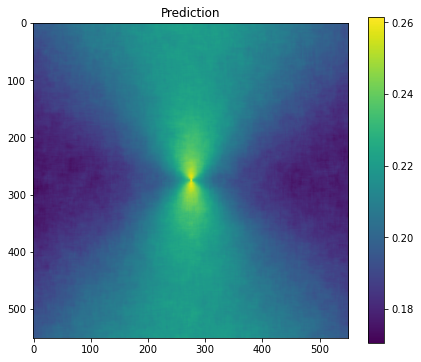

<Figure size 1728x432 with 0 Axes>

In [3]:
#Initialize and run generator. This piece will need user input on whether or not to use cuda(),
#             so it will have to go inside the class init in lenstronomy

import os
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"  #uncomment this as well as all ".cuda()" instances to work on GPU
import sys
import numpy as np
import torch
import matplotlib.pyplot as plt
net = model.load_from_checkpoint(weights_path) #.cuda()
def generate_maps(net,scaling_x,scaling_y,input_p, plot=True):
    """Generate velocity maps given input parameters.
    
    net: neural network object
    scaling_x: input scaler
    scaling_y: output scaling
    input_p: input parameters
    plt: plot if True
    
    Returns the velocity maps 
    """
    
    input_p = scaling_x.transform(np.reshape(input_p,(-1,len(input_p))))
    input_p = torch.Tensor(input_p)#.cuda()
    net.eval()
    
    with torch.no_grad():
        pred = net(input_p.unsqueeze(0)).cpu().numpy()
    
    if plot:
        plt.figure(figsize=(24, 6))
        plt.subplot(131)
        plt.imshow(pred[0,:,:].squeeze())
        plt.title('Prediction')
        plt.colorbar()
    
    return pred*scaling_y

example_input = [9.44922512e-01, 8.26468232e-01, 1.00161407e+00, 3.10945081e+00, 7.90308638e-01, 1.00000000e-04, 4.60606795e-01, 2.67345695e-01, 8.93001866e+01]
print('input params: ',example_input)
output = generate_maps(net,scaling_x,scaling_y,example_input, plot=True)
plt.figure(figsize=(24, 6))